In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
#바이잇나우 구매자가 산다고누른것, 근데 판매자가 거부할 수도있기에 반드시 팔리는것 아님

In [4]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [5]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [6]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [7]:
#블랙도 이름이 다양하다
#하나로 묶어도 될듯?
# 기종별로 색깔 그룹바이 실행해보자
data[['color','productline']].groupby('productline').value_counts(sort=False)

productline    color         
Galaxy_Note10  Aura Black         19
               Gold               46
               Space Gray         91
               White              76
Galaxy_Note8   Gold                1
               Midnight Black     58
               Space Gray          2
               White              44
Galaxy_Note9   Black              10
               Space Gray         27
               White              37
Galaxy_S10     Gold                1
               Prism Black         1
               Space Gray          1
               White               5
Galaxy_S7      Midnight Black    111
               Space Gray          3
               White              21
Galaxy_S8      Midnight Black     59
               Space Gray         38
               White              55
Galaxy_S9      Midnight Black     46
               Space Gray          1
               White              51
Unknown        Black              28
               Gold                4
        

In [9]:
data_no_color= data.copy()

#기종알고있으면 그 기종에서 최빈값 넣어주기?
* 기종별로 색상

In [12]:
color_by_product=data.groupby('productline')['color'].value_counts()
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [ ]:
# 가장많이 팔린 색으로 넣어주기

In [13]:
data[data['color'].isna()==True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [14]:
data[(data['color'].isna()==True) &(data['productline']=='Galaxy_Note10')]['color'] =='Space Gray'

27      False
29      False
30      False
42      False
43      False
        ...  
1397    False
1416    False
1428    False
1429    False
1464    False
Name: color, Length: 119, dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [18]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_Note10'),'color'] ='Space Gray'

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1011 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [20]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_Note8'),'color'] ='Midnight Black'

In [21]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_Note9'),'color'] ='White'

In [22]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_S10'),'color'] ='White'

In [23]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_S7'),'color'] ='Midnight Black'

In [24]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_S8'),'color'] ='Midnight Black'

In [25]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Galaxy_S9'),'color'] ='White'

In [29]:
data.loc[(data['color'].isna()==True) &(data['productline']=='Unknown'),'color'] ='White'

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [31]:
data.groupby('color')['sold'].value_counts(sort=False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

In [ ]:
#컬러가 판매에 크게 영향 X??
#결측값은 기종에따른 최빈값으로 대치해줬지만 컬러가 큰 영향이 있어보이진 않는다는 결과


In [32]:
#컬러 작업 더 해주기
data['color'].unique()

array(['White', 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [33]:
data_no_color= data.copy()

In [2]:
#컬러 통일 작업
for i in list(data['color'].unique()):
    if "Black" in i:
        print("Black")
    else:
        print(i)
               

NameError: name 'data' is not defined

In [ ]:
#노트9의 가격 describe
# 품명==언노운&색==블랙 의 ? 블랙색상으로 품명 유추가능?
#color애매해서 일단 보류. -블랙은 같은 블랙으로 묶어?

# 전처리

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [8]:
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [9]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [10]:
data['carrier'] = data['carrier'].fillna('unknown')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [12]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [13]:
data['color'] = data['color'].fillna('unknown')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [15]:
data.head(20)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,unknown,unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,unknown,unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,unknown,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,unknown,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,unknown,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,unknown,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


<Axes: xlabel='BuyItNow,sold'>

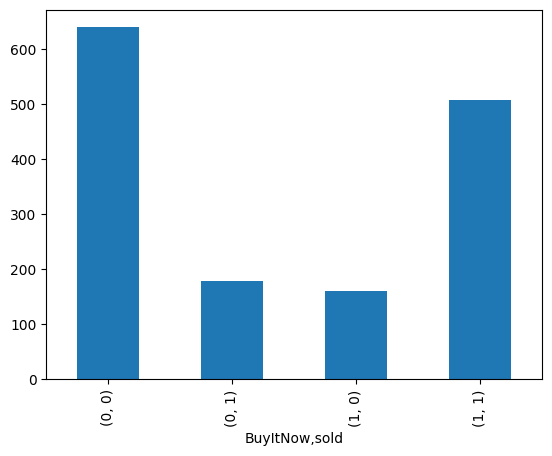

In [16]:
data[['BuyItNow', 'sold']].groupby('BuyItNow').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='color,sold'>

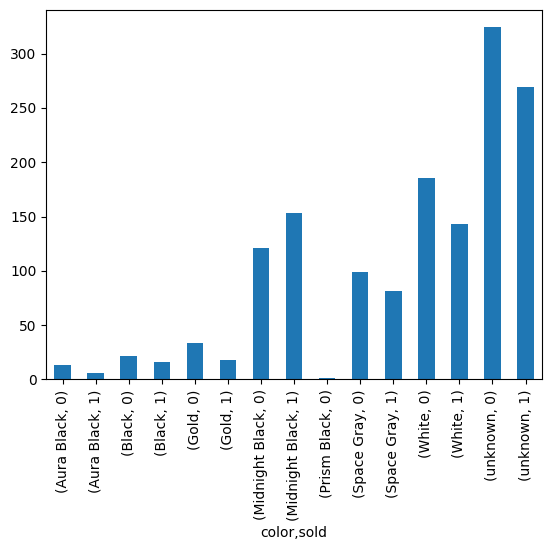

In [17]:
data[['color', 'sold']].groupby('color').value_counts(sort=False).plot(kind='bar')

In [18]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [19]:
data[['sold', 'productline']].groupby('sold').value_counts(sort=True)

sold  productline  
0     Galaxy_Note10    202
      Galaxy_S8        145
      Unknown          122
      Galaxy_S7        102
      Galaxy_S9         93
      Galaxy_Note8      73
      Galaxy_Note9      58
      Galaxy_S10         4
1     Galaxy_Note10    149
      Galaxy_S8        132
      Galaxy_S7        125
      Unknown           82
      Galaxy_Note8      80
      Galaxy_S9         65
      Galaxy_Note9      49
      Galaxy_S10         4
Name: count, dtype: int64

* Galaxy_Note8 이 Galaxy_S9 보다 잘팔림

In [58]:
data[['carrier', 'sold']].groupby('carrier').value_counts(sort=False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
unknown          0       629
                 1       540
Name: count, dtype: int64

In [59]:
629/(629+540)

0.5380667236954663

In [61]:
data = data.drop('carrier', axis=1)
data.head()

,BuyItNow,startprice,color,productline,sold
0,0,199.99,White,Galaxy_S9,1
1,0,235.00,unknown,Galaxy_Note9,0
2,0,199.99,unknown,Unknown,0
3,1,175.00,Space Gray,Galaxy_Note9,1
4,1,100.00,Space Gray,Galaxy_S8,1


<Axes: xlabel='carrier,sold'>

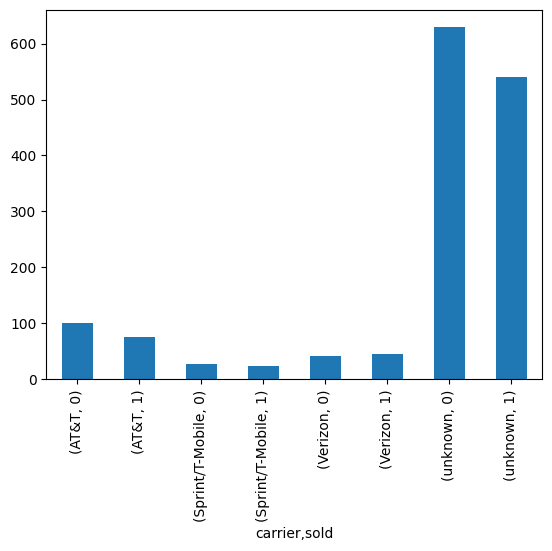

In [20]:
data[['carrier', 'sold']].groupby('carrier').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='noDescription,sold'>

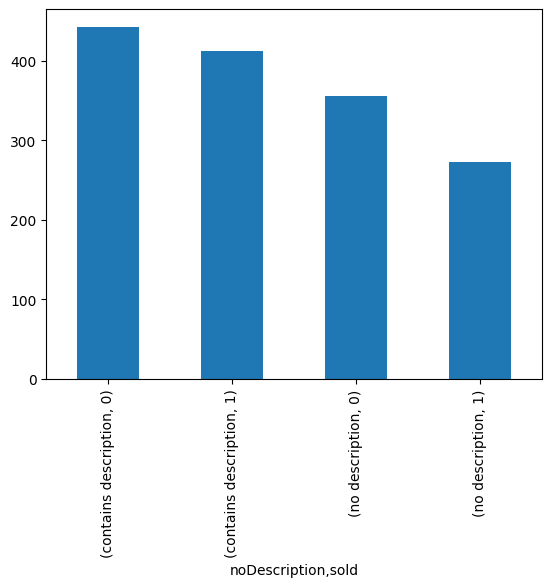

In [21]:
data[['noDescription', 'sold']].groupby('noDescription').value_counts(sort=False).plot(kind='bar')

In [22]:
data[['upperCaseDescription', 'sold']].groupby('upperCaseDescription').value_counts(sort=False)

upperCaseDescription  sold
0                     0       456
                      1       434
1                     0        65
                      1        61
2                     0        71
                             ... 
76                    1         2
77                    0         1
78                    0         2
80                    0         3
81                    0         2
Name: count, Length: 66, dtype: int64

In [23]:
data[['charCountDescription', 'sold']].groupby('charCountDescription').value_counts(sort=False)

charCountDescription  sold
0                     0       443
                      1       413
3                     0         1
4                     1         3
5                     0         1
                             ... 
106                   1         1
108                   0         1
                      1         1
109                   1         1
111                   1         1
Name: count, Length: 175, dtype: int64

In [24]:
data['charCountDescription'].max()

np.int64(111)

In [25]:
# def charCount(x):
#     if x < 55:
#         return "under10"
#     else:
#         return "10s"
    
        
    
# data['Age'] = data['Age'].apply(ages)

# EDA

In [26]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [ ]:
#가격 -> 평균하고 max값 많이 떨어져있다 -> 이상치가 있을것 추론
# 디스크립션 -> 대부분 빈칸

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [28]:
data1 = data.copy()
data2 = data.copy()

### groupby로 독립변수와 종속변수간 규칙 찾기

In [29]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,unknown,unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,unknown,unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,contains description,0,0,1


In [30]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [31]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

In [32]:
data[['startprice', 'productline']].groupby('productline').mean()

,startprice
productline,
Galaxy_Note10,366.931311
Galaxy_Note8,176.065033
Galaxy_Note9,254.561402
Galaxy_S10,294.583750
Galaxy_S7,84.190000
Galaxy_S8,165.883321
Galaxy_S9,231.268101
Unknown,171.994265


In [33]:
data[['BuyItNow', 'productline','sold']].groupby(['productline','BuyItNow']).value_counts(sort=True)

productline    BuyItNow  sold
Galaxy_Note10  0         0       174
                         1        37
               1         1       112
                         0        28
Galaxy_Note8   0         0        59
                         1        17
               1         1        63
                         0        14
Galaxy_Note9   0         0        46
                         1        15
               1         1        34
                         0        12
Galaxy_S10     0         0         4
                         1         3
               1         1         1
Galaxy_S7      0         0        80
                         1        29
               1         1        96
                         0        22
Galaxy_S8      0         0       108
                         1        33
               1         1        99
                         0        37
Galaxy_S9      0         0        74
                         1        19
               1         1        46
        

In [34]:
data[['BuyItNow', 'sold']].groupby('BuyItNow').value_counts(sort=True)

BuyItNow  sold
0         0       639
          1       179
1         1       507
          0       160
Name: count, dtype: int64

* 바로 구매가능한지 여부 -> 팔렸는지 안팔렸는지

In [35]:
# 바로 구매 0-> 팔림 : 
507/(507+160)*100

76.01199400299849

In [36]:
# 바로 구매 0-> 안팔림 : 
160/(507+160)*100

23.988005997001498

In [37]:
# 바로 구매 X-> 안팔림 : 
639/(639+179)*100

78.11735941320293

In [38]:
# 바로 구매 X-> 팔림 : 
179/(639+179)*100

21.882640586797066

In [39]:
data[['BuyItNow', 'productline']].groupby('BuyItNow').value_counts(sort=True)

BuyItNow  productline  
0         Galaxy_Note10    211
          Galaxy_S8        141
          Unknown          120
          Galaxy_S7        109
          Galaxy_S9         93
          Galaxy_Note8      76
          Galaxy_Note9      61
          Galaxy_S10         7
1         Galaxy_Note10    140
          Galaxy_S8        136
          Galaxy_S7        118
          Unknown           84
          Galaxy_Note8      77
          Galaxy_S9         65
          Galaxy_Note9      46
          Galaxy_S10         1
Name: count, dtype: int64

In [40]:
data[['sold', 'productline']].groupby('sold').value_counts(sort=True)

sold  productline  
0     Galaxy_Note10    202
      Galaxy_S8        145
      Unknown          122
      Galaxy_S7        102
      Galaxy_S9         93
      Galaxy_Note8      73
      Galaxy_Note9      58
      Galaxy_S10         4
1     Galaxy_Note10    149
      Galaxy_S8        132
      Galaxy_S7        125
      Unknown           82
      Galaxy_Note8      80
      Galaxy_S9         65
      Galaxy_Note9      49
      Galaxy_S10         4
Name: count, dtype: int64

*  Galaxy_S10 인기 없음

In [41]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [42]:
data[['upperCaseDescription', 'sold']].groupby('upperCaseDescription').value_counts(sort=False)

upperCaseDescription  sold
0                     0       456
                      1       434
1                     0        65
                      1        61
2                     0        71
                             ... 
76                    1         2
77                    0         1
78                    0         2
80                    0         3
81                    0         2
Name: count, Length: 66, dtype: int64

In [43]:
data[['charCountDescription', 'sold']].groupby('charCountDescription').value_counts(sort=False)

charCountDescription  sold
0                     0       443
                      1       413
3                     0         1
4                     1         3
5                     0         1
                             ... 
106                   1         1
108                   0         1
                      1         1
109                   1         1
111                   1         1
Name: count, Length: 175, dtype: int64

In [44]:
# data = data.drop('upperCaseDescription', axis=1)
# data.head()

In [45]:
data.head(20)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,unknown,unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,unknown,unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,unknown,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,unknown,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,unknown,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,unknown,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


In [47]:
data[['upperCaseDescription', 'charCountDescription']].groupby('upperCaseDescription').value_counts(sort=False)

upperCaseDescription  charCountDescription
0                     0                       856
                      3                         1
                      5                         1
                      6                         1
                      9                         2
                                             ... 
78                    101                       1
80                    98                        1
                      100                       2
81                    97                        1
                      99                        1
Name: count, Length: 344, dtype: int64

* noDescription : 판매자가 설명을 썼는지 안썼는지
* charCountDescriptio : 설명이 얼마나 긴지
* upperCaseDescription : 몇 문장인지

In [49]:
data[['noDescription', 'sold']].groupby('noDescription').value_counts(sort=False)

noDescription         sold
contains description  0       443
                      1       413
no description        0       356
                      1       273
Name: count, dtype: int64

<Axes: xlabel='noDescription,sold'>

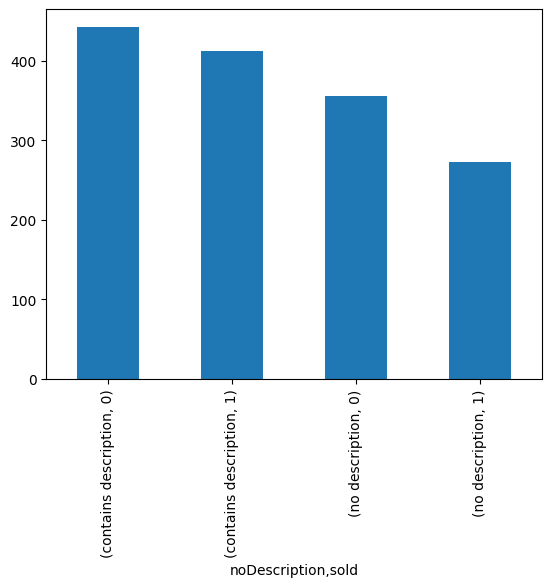

In [50]:
data[['noDescription', 'sold']].groupby('noDescription').value_counts(sort=False).plot(kind='bar')

* 상품 설명 있든 없든 팔리는것 반반

In [51]:
data = data.drop('noDescription', axis=1)
data.head()

,BuyItNow,startprice,carrier,color,productline,charCountDescription,upperCaseDescription,sold
0,0,199.99,unknown,White,Galaxy_S9,0,0,1
1,0,235.00,unknown,unknown,Galaxy_Note9,0,0,0
2,0,199.99,unknown,unknown,Unknown,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,0,0,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,0,0,1


In [52]:
data[['sold' ,'charCountDescription']].groupby('sold').value_counts(sort=False)

sold  charCountDescription
0     0                       443
      3                         1
      5                         1
      8                         2
      9                         2
                             ... 
1     105                       2
      106                       1
      108                       1
      109                       1
      111                       1
Name: count, Length: 175, dtype: int64

In [53]:
data[['sold' ,'upperCaseDescription']].groupby('sold').value_counts(sort=False)

sold  upperCaseDescription
0     0                       456
      1                        65
      2                        71
      3                        43
      4                        47
                             ... 
1     53                        1
      58                        1
      69                        1
      74                        1
      76                        2
Name: count, Length: 66, dtype: int64

In [54]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'charCountDescription', 'upperCaseDescription', 'sold'],
      dtype='object')

In [55]:
data_corr = data[['charCountDescription', 'upperCaseDescription', 'sold' ]].corr()
data_corr

,charCountDescription,upperCaseDescription,sold
charCountDescription,1.000000,0.394730,-0.073461
upperCaseDescription,0.394730,1.000000,-0.058993
sold,-0.073461,-0.058993,1.000000


* -1.0 ~ -0.7 또는 0.7 ~ 1.0:    강한 상관관계
* -0.7 ~ -0.5 또는 0.5 ~ 0.7:    보통의 상관관계
* -0.5 ~ -0.3 또는 0.3 ~ 0.5:    약한 상관관계
* -0.3 ~ 0.3:                    거의 없는 상관관계

In [56]:
data = data.drop(['charCountDescription', 'upperCaseDescription'], axis=1)

data.head()

,BuyItNow,startprice,carrier,color,productline,sold
0,0,199.99,unknown,White,Galaxy_S9,1
1,0,235.00,unknown,unknown,Galaxy_Note9,0
2,0,199.99,unknown,unknown,Unknown,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,1


# Feature Engineering

*  Galaxy_S10 인기 없음

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BuyItNow     1485 non-null   int64  
 1   startprice   1485 non-null   float64
 2   color        1485 non-null   object 
 3   productline  1485 non-null   object 
 4   sold         1485 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 58.1+ KB


<Axes: xlabel='sold,color'>

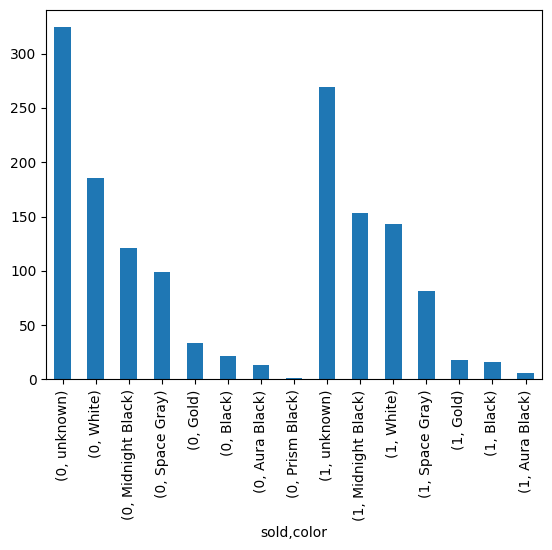

In [67]:
data[['color','sold']].groupby('sold').value_counts(sort=True).plot(kind='bar')

In [69]:
data[['productline','sold']].groupby('sold').value_counts(sort=True)

sold  productline  
0     Galaxy_Note10    202
      Galaxy_S8        145
      Unknown          122
      Galaxy_S7        102
      Galaxy_S9         93
      Galaxy_Note8      73
      Galaxy_Note9      58
      Galaxy_S10         4
1     Galaxy_Note10    149
      Galaxy_S8        132
      Galaxy_S7        125
      Unknown           82
      Galaxy_Note8      80
      Galaxy_S9         65
      Galaxy_Note9      49
      Galaxy_S10         4
Name: count, dtype: int64

<Axes: xlabel='sold,productline'>

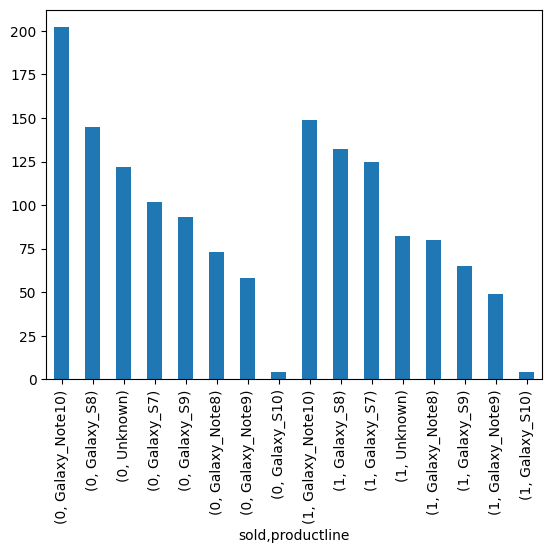

In [68]:
data[['productline','sold']].groupby('sold').value_counts(sort=True).plot(kind='bar')

In [63]:
data[['BuyItNow', 'productline']].groupby('BuyItNow').value_counts(sort=True)

BuyItNow  productline  
0         Galaxy_Note10    211
          Galaxy_S8        141
          Unknown          120
          Galaxy_S7        109
          Galaxy_S9         93
          Galaxy_Note8      76
          Galaxy_Note9      61
          Galaxy_S10         7
1         Galaxy_Note10    140
          Galaxy_S8        136
          Galaxy_S7        118
          Unknown           84
          Galaxy_Note8      77
          Galaxy_S9         65
          Galaxy_Note9      46
          Galaxy_S10         1
Name: count, dtype: int64

In [64]:
data[['sold', 'productline']].groupby('sold').value_counts(sort=True)

sold  productline  
0     Galaxy_Note10    202
      Galaxy_S8        145
      Unknown          122
      Galaxy_S7        102
      Galaxy_S9         93
      Galaxy_Note8      73
      Galaxy_Note9      58
      Galaxy_S10         4
1     Galaxy_Note10    149
      Galaxy_S8        132
      Galaxy_S7        125
      Unknown           82
      Galaxy_Note8      80
      Galaxy_S9         65
      Galaxy_Note9      49
      Galaxy_S10         4
Name: count, dtype: int64

*  Galaxy_S10 인기 없음

# 데이터 분리 및 분석

# 성능평가 및 성능 개선을 위한 튜닝